In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
cwd = './results/shunqing'
files = [file for file in os.listdir(cwd) if file.endswith('.npy')]
events = list(set(['_'.join(file.split('_')[:2]) for file in files]))
print(events)

['bpswmm_814', 'bpswmm_246', 'bpswmm_116', 'bpswmm_86', 'bpswmm_135', 'bpswmm_243', 'bpswmm_133', 'bpswmm_913', 'bpswmm_163', 'bpswmm_162', 'bpswmm_88', 'bpswmm_168', 'bpswmm_92', 'bpswmm_610', 'bpswmm_244', 'bpswmm_820', 'bpswmm_85', 'bpswmm_616', 'bpswmm_249', 'bpswmm_810', 'bpswmm_248', 'bpswmm_241', 'bpswmm_2412', 'bpswmm_78', 'bpswmm_77', 'bpswmm_715', 'bpswmm_164', 'bpswmm_2413', 'bpswmm_61', 'bpswmm_104', 'bpswmm_75', 'bpswmm_84', 'bpswmm_910', 'bpswmm_915', 'bpswmm_139', 'bpswmm_63', 'bpswmm_817', 'bpswmm_132', 'bpswmm_119', 'bpswmm_815', 'bpswmm_614', 'bpswmm_83', 'bpswmm_1311', 'bpswmm_724', 'bpswmm_101', 'bpswmm_713', 'bpswmm_813', 'bpswmm_914', 'bpswmm_112', 'bpswmm_245', 'bpswmm_67', 'bpswmm_98', 'bpswmm_111', 'bpswmm_726', 'bpswmm_916', 'bpswmm_1611', 'bpswmm_87', 'bpswmm_167', 'bpswmm_823', 'bpswmm_81', 'bpswmm_118', 'bpswmm_94', 'bpswmm_69', 'bpswmm_96', 'bpswmm_138', 'bpswmm_136', 'bpswmm_93', 'bpswmm_1312', 'bpswmm_95', 'bpswmm_821', 'bpswmm_247', 'bpswmm_109', 'bpswm

In [7]:
event = 'bpswmm_71'
r = np.load(os.path.join(cwd,event+'_runoff.npy'))
true = np.load(os.path.join(cwd,event+'_true.npy'))
true.shape


(445, 12, 105, 4)

In [8]:
err = true

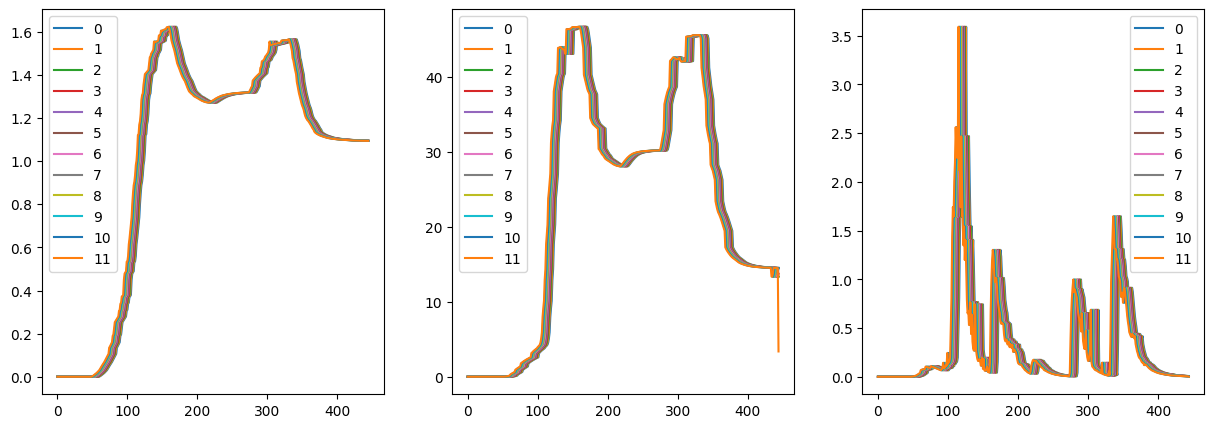

In [9]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
for i,ax in enumerate(axes):
    for j in range(err.shape[1]):
        ax.plot(np.abs(err).mean(axis=2)[:,j,i],label=j)
    ax.legend()

Text(0.5, 1.0, 'Flooding')

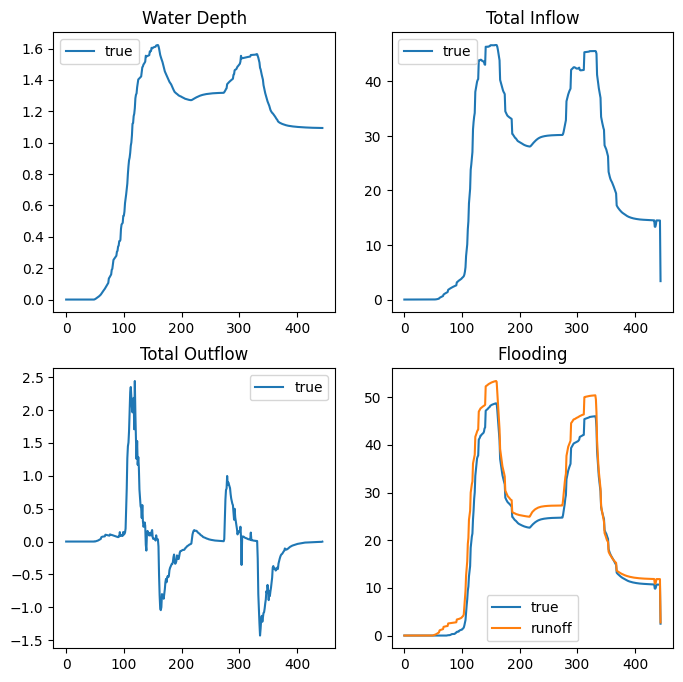

In [10]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
seq = -1

# ax1.plot(pred[:,seq,...].mean(axis=1)[:,0],label='pred')
ax1.plot(true[:,seq,...].mean(axis=1)[:,0],label='true')
ax1.legend()
ax1.set_title('Water Depth')

# ax2.plot(pred[:,seq,...].mean(axis=1)[:,1],label='pred')
ax2.plot(true[:,seq,...].mean(axis=1)[:,1],label='true')
ax2.legend()
ax2.set_title('Total Inflow')

# ax3.plot(pred[:,seq,...].mean(axis=1)[:,2],label='pred')
ax3.plot(true[:,seq,...].mean(axis=1)[:,2],label='true')
ax3.legend()
ax3.set_title('Total Outflow')

# ax4.plot(pred[:,seq,...].mean(axis=1)[:,-1],label='pred')
ax4.plot(true[:,seq,...].mean(axis=1)[:,-1],label='true')
ax4.plot(r[:,seq,...].mean(axis=1),label='runoff')
ax4.legend()
ax4.set_title('Flooding')

In [ ]:
from swmm_api import read_inp_file
inp = read_inp_file('./envs/network/shunqing/shunqing.inp')
nodes = [k for k in inp.JUNCTIONS]